In [12]:
cd(@__DIR__)
include("table_reader.jl")
include("utils.jl")

Monthly_stats

In [13]:
series=extract_series("TX_STAID000031.txt",plot=false)

Row,DATE,TX
,Date,Float64
1,1897-01-01,11.6
2,1897-01-02,12.3
3,1897-01-03,13.0
4,1897-01-04,10.2
5,1897-01-05,14.0
6,1897-01-06,11.6
7,1897-01-07,15.5
8,1897-01-08,15.1
9,1897-01-09,14.7


In [14]:
years=unique(Dates.year.(series.DATE))

107-element Vector{Int64}:
 1897
 1898
 1899
 1900
 1901
 1902
 1903
 1904
 1905
 1906
    ⋮
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003

## Segmenting the dataset by month

In [15]:
include("utils.jl")
Monthly_date=MonthlySeparateDates(series.DATE)
Monthly_temp=MonthlySeparateX(series.TX,series.DATE)

12-element Vector{Vector{Any}}:
 [[11.6, 12.3, 13.0, 10.2, 14.0, 11.6, 15.5, 15.1, 14.7, 15.8  …  9.0, 2.5, 0.0, 3.8, 10.4, 10.9, 5.1, 5.1, 7.5, 6.0], [11.3, 12.4, 15.7, 14.1, 13.9, 12.2, 12.4, 12.8, 12.4, 13.1  …  14.0, 16.1, 12.2, 15.5, 12.5, 12.7, 14.8, 12.7, 10.7, 16.0], [9.8, 15.2, 9.1, 11.8, 15.7, 15.4, 14.1, 14.3, 14.7, 15.4  …  15.6, 15.3, 10.1, 5.5, 2.7, 8.1, 8.3, 11.9, 10.5, 13.9], [15.8, 17.8, 18.8, 13.8, 12.1, 12.8, 11.0, 11.0, 11.4, 9.3  …  15.1, 17.6, 13.2, 12.7, 13.4, 11.5, 8.4, 6.4, 7.9, 10.3], [11.1, 10.7, 7.6, 6.3, 4.5, 4.1, 5.3, 9.9, 9.8, 10.8  …  14.5, 12.9, 14.2, 13.9, 12.8, 12.5, 14.6, 12.8, 8.7, 8.1], [14.7, 9.8, 16.0, 17.6, 14.3, 12.3, 13.2, 13.5, 11.8, 8.4  …  11.9, 14.7, 11.7, 13.0, 7.2, 10.1, 13.5, 11.6, 7.8, 8.0], [8.5, 11.0, 14.7, 14.6, 15.5, 15.0, 14.7, 15.3, 16.1, 16.0  …  12.6, 11.0, 11.0, 13.3, 13.8, 13.8, 13.8, 12.4, 13.4, 14.5], [12.9, 14.3, 14.0, 10.8, 12.0, 12.7, 12.5, 14.3, 9.5, 7.9  …  10.9, 13.3, 12.0, 14.5, 12.0, 13.4, 12.4, 13.9, 12.1, 11.8], [

# I. Series filtered by removing monthly drift

## Monthly Drift

In [16]:
Monthly_trend, Monthly_undrifted = [[] for _ in 1:12], [[] for _ in 1:12]

for i in 1:12
    for month_temp in Monthly_temp[i]
        N=length(month_temp)
        X=cat(ones(N),1:N,dims=2)
        beta=inv(transpose(X)*X)*transpose(X)*month_temp
        append!(Monthly_trend[i],[X*beta])
        append!(Monthly_undrifted[i],[month_temp-X*beta])
    end
end

In [17]:
Monthly_undrifted

12-element Vector{Vector{Any}}:
 [[-3.6175403225806484, -2.6183064516129058, -1.6190725806451631, -4.119838709677422, -0.020604838709679996, -2.121370967741937, 2.077862903225805, 1.9770967741935461, 1.8763306451612873, 3.2755645161290303  …  0.06637096774193552, -6.134395161290323, -8.335161290322581, -4.23592741935484, 2.663306451612903, 3.4625403225806455, -2.0382258064516137, -1.738991935483872, 0.9602419354838716, -0.24052419354838683], [-2.506451612903211, -1.4238709677419212, 1.858709677419366, 0.24129032258065664, 0.023870967741947524, -1.6935483870967651, -1.510967741935474, -1.1283870967741834, -1.5458064516128935, -0.8632258064516041  …  -0.17225806451612868, 1.910322580645163, -2.007096774193549, 1.2754838709677419, -1.741935483870968, -1.5593548387096803, 0.5232258064516113, -1.5941935483871, -3.6116129032258115, 1.6709677419354794], [-4.831250000000015, 0.6936290322580501, -5.281491935483883, -2.4566129032258175, 1.5682661290322457, 1.3931451612903132, 0.21802419354837888

Presence of missing values in February 1956 !

In [18]:
print(length.(Monthly_temp[2]))
findall(x->x==22,length.(Monthly_temp[2]))
#println(Monthly_date[2][60])

[28, 28, 28, 28, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 26, 28, 28, 29, 28, 28, 28, 29, 27, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 27, 28, 22, 27, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28]

1-element Vector{Int64}:
 60

Exemple in 1980

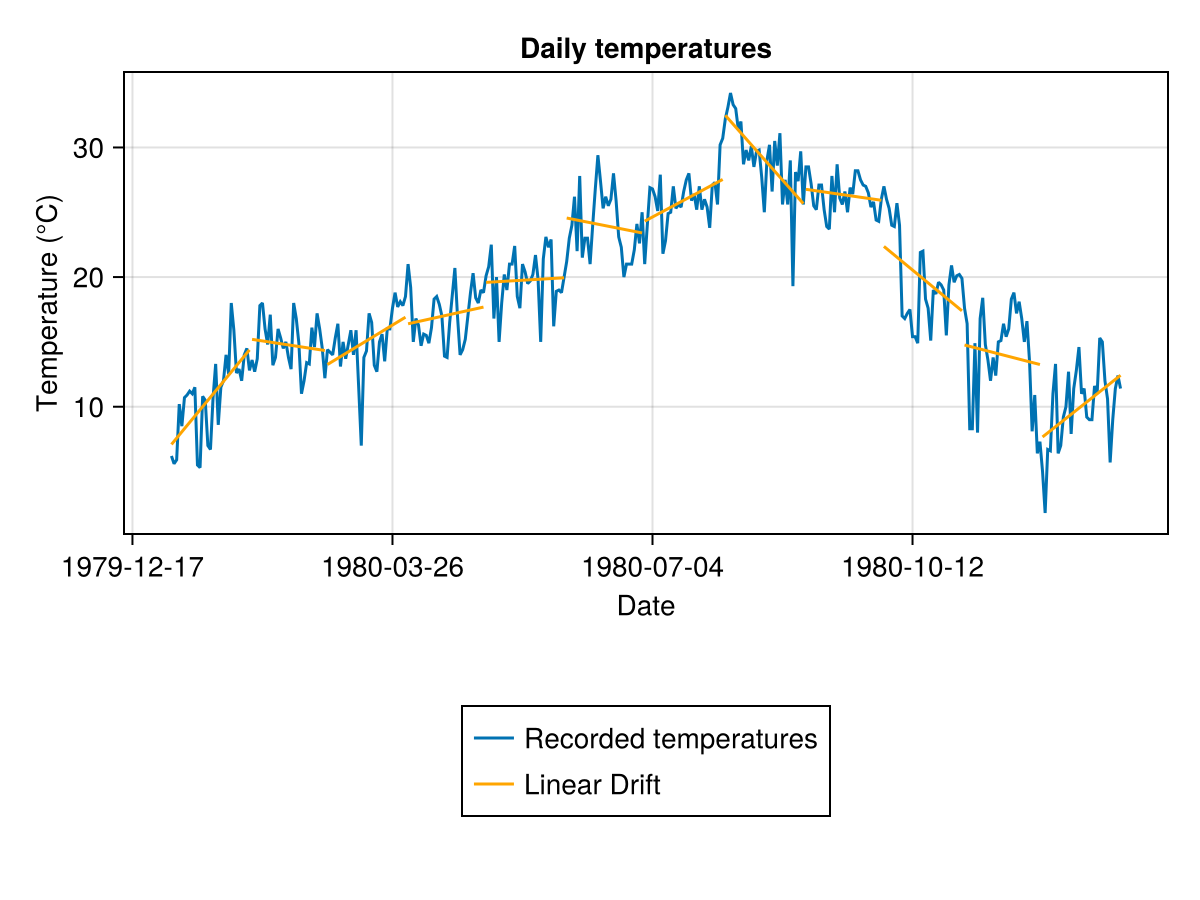

In [24]:
year_index=findall(x->x==1980,years)[1]
fig=Figure()
ax, plot1=lines(fig[1:2, 1:2], series.DATE[Iyear(series.DATE,1980)], series[Iyear(series.DATE,1980),2])
for i in 1:11
    plot2=lines!(ax,Monthly_date[i][year_index],Monthly_trend[i][year_index] ; color="orange")
end
plot2=lines!(ax,Monthly_date[12][year_index],Monthly_trend[12][year_index] ; color="orange")
ax.title="Daily temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
Legend(fig[3, 1:2],[plot1,plot2],["Recorded temperatures","Linear Drift"])
current_figure()

## Autocorrelations

### ACF

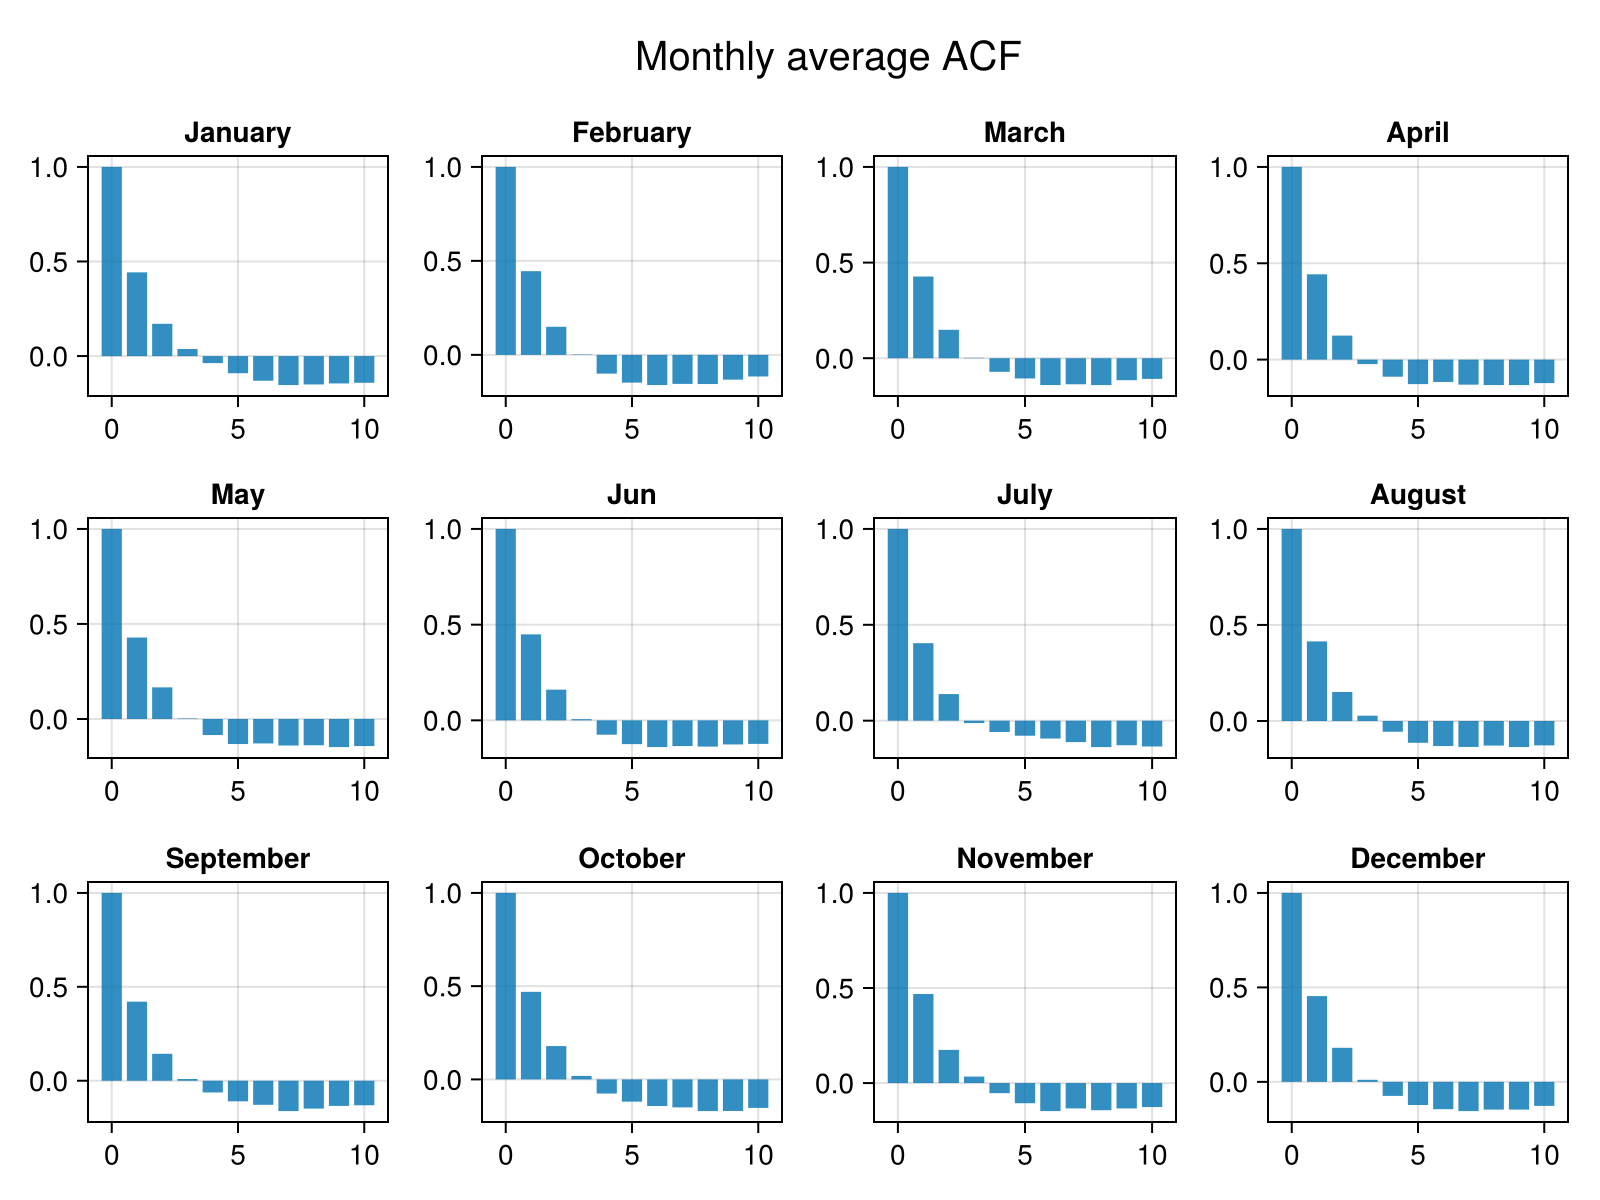

In [25]:
fig=Figure(size=(800,600))
supertitle=Label(fig[1, 1:4], "Monthly average ACF", fontsize = 20)
for i in 1:12
    autocor_vec=[autocor(Monthly_undrifted[i][j] ,0:10) for j in eachindex(Monthly_undrifted[i])] #One element per year
    ax,plot=barplot(fig[((i-1) ÷ 4) + 2, (i-1) % 4 + 1], 0:10, mean(autocor_vec) )
    ax.title=Month_vec[i]
end
current_figure()

### PACF

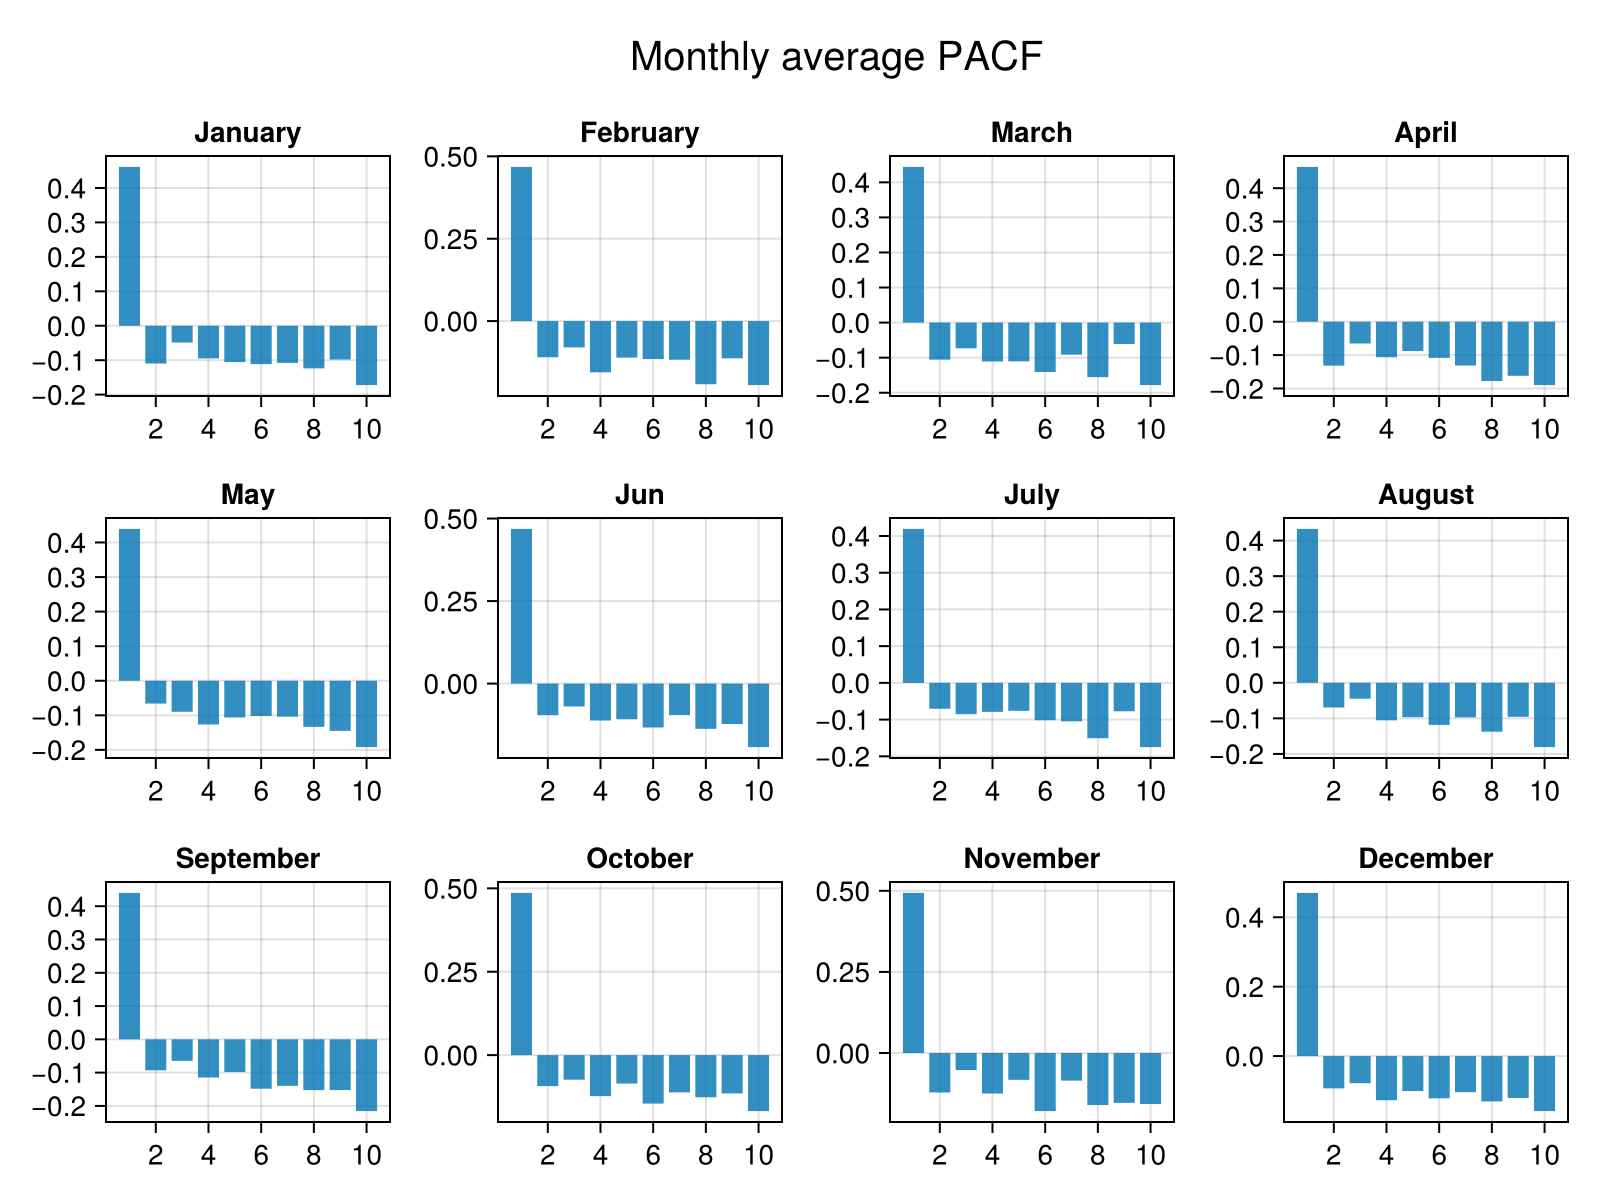

In [26]:
fig=Figure(size=(800,600))
supertitle=Label(fig[1, 1:4], "Monthly average PACF", fontsize = 20)
for i in 1:12
    pacf_vec=[pacf(Monthly_undrifted[i][j] ,1:10) for j in eachindex(Monthly_undrifted[i])] #One element per year
    ax,plot=barplot(fig[((i-1) ÷ 4) + 2, (i-1) % 4 + 1], 1:10, mean(pacf_vec) )
    ax.title=Month_vec[i]
end
current_figure()

For each month, it still looks like an AR(1) model

### Estimation with maximum of sum of Likelyhood

In [32]:
p=1
Φ_month_sumLL=[]
σ_month_sumLL=[]
for x_month in Monthly_undrifted
    Estimation=LL_AR_Estimation_sum(x_month,p)
    append!(Φ_month_sumLL,Estimation[1])
    append!(σ_month_sumLL,Estimation[2]^0.5)
end

In [28]:
include("utils.jl")

Monthly_stats

In [33]:
Φ_month_sumLL

12-element Vector{Any}:
 0.5570858931373567
 0.5143214901045767
 0.4928172344171536
 0.49077687469772235
 0.487953738318779
 0.5008964203127302
 0.449401432475918
 0.4575415932674497
 0.4808992140526616
 0.5324520515335389
 0.5456235106991789
 0.5242144160760138

In [34]:
σ_month_sumLL

12-element Vector{Any}:
 2.1944155472602542
 2.2177072745998188
 2.0749120751263406
 2.147978745299139
 2.188888229838447
 2.03631014401597
 1.8655015710009204
 1.8354619785455757
 1.817324885277509
 1.9386534103552007
 2.120434170557985
 2.241187538700004

### Simulation

In [121]:
function simulation(x::Vector,Φ::Vector,σ,n)
    y,p=copy(x),length(x)
    return simulation!(x,Φ,σ,n,y,p)
end

function simulation!(x::Vector,Φ::Vector,σ,n,y,p)
    for _ in 1:n
        append!(y, dot(y[end:-1:end-p+1],Φ) + σ * randn())
    end
    return y[p+1:end]
end

simulation(x::Number,Φ::Number,σ,n) = simulation([x],[Φ],σ,n)

simulation (generic function with 2 methods)

In [122]:
noised_prev=simulation(x[(end-p+1):end],Φ,σ,365*2)

MethodError: MethodError: no method matching simulation(::Vector{Float64}, ::Float64, ::Int64, ::Int64)
The function `simulation` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  simulation(!Matched::Number, ::Number, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X66sZmlsZQ==.jl:13
  simulation(::Vector, !Matched::Vector, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X66sZmlsZQ==.jl:1


In [123]:
fig=Figure()
ax, plot1=lines(fig[1:2, 1:2], series.DATE[end-365*4:end], x[end-365*4:end])
plot2=lines!(ax,new_date_range,[x[end] ;noised_prev])
ax.title="Daily temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
Legend(fig[3, 1:2],[plot1,plot2],["Recorded temperatures","forecast for two years"])
current_figure()

UndefVarError: UndefVarError: `noised_prev` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [124]:
noised_prev_pm=noised_prev + repeat(repeated_period[end-364:end],2) .+ beta[1]

UndefVarError: UndefVarError: `noised_prev` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [125]:
function plot_simulation(n_future_period=2,n_old_period::Int=0) #Use global variables
    new_date_range=series.DATE[end]:Day(1):(series.DATE[end]+Day(365*n_future_period))
    noised_prev=simulation(x[(end-p+1):end],Φ,σ,365*n_future_period)
    noised_prev_pm=noised_prev + repeat(repeated_period[end-364:end],n_future_period) .+ beta[1]
    fig=Figure()
    if n_old_period==0
        ax, plot1=lines(fig[1:2, 1:2], series.DATE, series.TX)
    else
        ax, plot1=lines(fig[1:2, 1:2], series.DATE[end-365*n_old_period:end], series.TX[end-365*n_old_period:end])
    end
    plot2=lines!(ax,new_date_range,[series.TX[end] ;noised_prev_pm])
    ax.title="Daily temperatures"
    ax.xlabel="Date"
    ax.ylabel="Temperature (°C)"
    Legend(fig[3, 1:2],[plot1,plot2],["Recorded temperatures","Simulation for $(n_future_period) years"])
    return fig
end

plot_simulation (generic function with 3 methods)

In [126]:
plot_simulation(20)

MethodError: MethodError: no method matching simulation(::Vector{Float64}, ::Float64, ::Int64, ::Int64)
The function `simulation` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  simulation(!Matched::Number, ::Number, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X66sZmlsZQ==.jl:13
  simulation(::Vector, !Matched::Vector, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X66sZmlsZQ==.jl:1


## Sampling simulations

In [127]:
series.DATE[1]

1897-01-01

In [128]:
function sample_simulation(x,Φ,σ,size_multiplicator=1)
    #Return a sample of (k-1)*size_multiplicator annual simulations of weather, according to the AR(1) model.
    Output=[]
    p=length(x)
    for _ in 1:size_multiplicator
        simulated=simulation(x,Φ,σ,365k-p) + repeated_period[(1+p):365k]
        append!(Output,[simulated[(365i+1-p):365*(i+1)-p] for i in 1:(k-1)]) #We do not put the first period
    end
    return Output
end

sample_simulation (generic function with 2 methods)

In [129]:
Φ

0.8

In [130]:
sample_raw=sample_simulation(x[1:p],Φ,σ,1) # ≈ 10 000 years simulated

MethodError: MethodError: no method matching simulation(::Vector{Float64}, ::Float64, ::Int64, ::Int64)
The function `simulation` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  simulation(!Matched::Number, ::Number, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X66sZmlsZQ==.jl:13
  simulation(::Vector, !Matched::Vector, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X66sZmlsZQ==.jl:1


To apply statistical functions on each days, the sample vector will be inverted (if it was shaped like v[year][day], now it is shaped like v[day][year]).

In [131]:
invert(L)=[[L[i][j] for i in eachindex(L)] for j in eachindex(L[1])]
sample=invert(sample_raw) 

UndefVarError: UndefVarError: `sample_raw` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [132]:
fig=Figure()
ax, plot1 = lines(fig[1:2,1:2], 1:365, average_period)
plot2=lines!(ax,1:365,mean.(sample))
ax.title="Average daily temperature during a year (centered)"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
Legend(fig[3, 1:2],[plot1,plot2],["Mean recorded temperatures","Mean simulated temperatures"])
current_figure()

MethodError: MethodError: no method matching iterate(::typeof(sample))
The function `iterate` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  iterate(!Matched::Scene)
   @ Makie C:\Users\goninarn\.julia\packages\Makie\ux0Te\src\scenes.jl:398
  iterate(!Matched::Scene, !Matched::Any)
   @ Makie C:\Users\goninarn\.julia\packages\Makie\ux0Te\src\scenes.jl:398
  iterate(!Matched::Base.MethodSpecializations)
   @ Base reflection.jl:1299
  ...


The generated sample seems to be unbiased.

In [133]:
fig=Figure()
ax, plot1 = band(fig[1:2,1:2],1:365,quantile.(sample,0.05),quantile.(sample,0.95) ; color=("orange",0.2))
plot2=band!(ax,1:365,quantile.(sample,0.25),quantile.(sample,0.75) ; color=("orange",0.5))
plot3=lines!(ax, 1:365, average_period)
ax.title="Average daily temperature during a year (centered)"
ax.xlabel="Day"
ax.ylabel="Temperature (°C)"
Legend(fig[3, 1:2],[plot3,plot2,plot1],["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.25,0.75]","Simulated temperatures quantile interval, p ∈ [0.1,0.9]"])
current_figure()

MethodError: MethodError: no method matching length(::typeof(sample))
The function `length` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  length(!Matched::Scene)
   @ Makie C:\Users\goninarn\.julia\packages\Makie\ux0Te\src\scenes.jl:399
  length(!Matched::Base.MethodSpecializations)
   @ Base reflection.jl:1317
  length(!Matched::DataStructures.SparseIntSet)
   @ DataStructures C:\Users\goninarn\.julia\packages\DataStructures\IrAJn\src\sparse_int_set.jl:61
  ...
